In [1]:
using Plots, StatsBase, Measures, Random, LaTeXStrings, Dates

In [2]:
include("../src/BubbleSortStatistics.jl");

In [3]:
x_grid = 0:0.01:7
plot(x_grid, 
    [cdf(GeneralizedKolmogorov(0.25),x_grid) cdf(GeneralizedKolmogorov(0.5),x_grid) cdf(GeneralizedKolmogorov(0.75),x_grid)  cdf(GeneralizedKolmogorov(1.0),x_grid)],
    label = ["β = 0.25" "β = 0.5" "β = 0.75" "β = 1.0"], xlabel = "x", ylabel = "cdf", ylim=(0,1),
    c = [:red :blue :green :black], lw = 2)

┌ Info: Precomputing integrals
└ @ Main /Users/uqjnazar/Dropbox/Bubble-sort_limit/Julia/BubbleSortStatistics.jl/src/GeneralizedKolmgorov.jl:45
Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


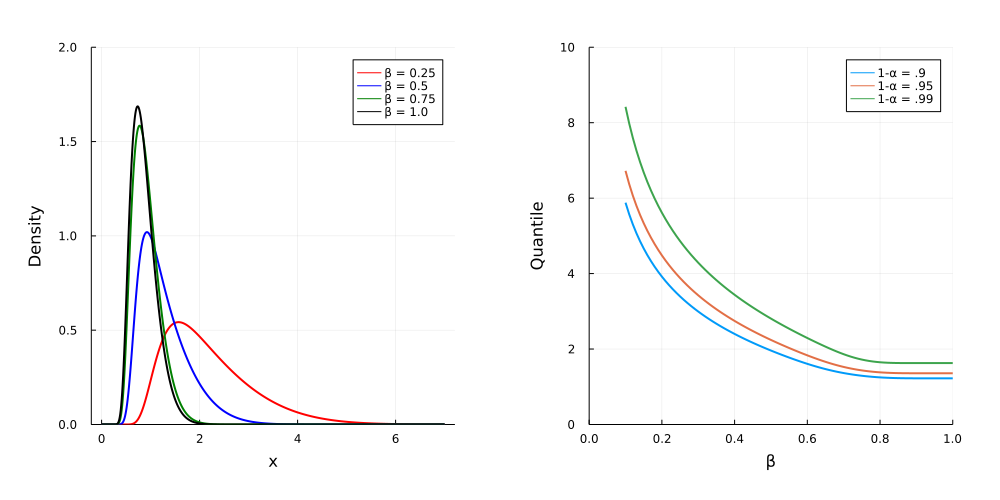

In [5]:
x_grid = 0:0.01:7
p1 = plot(x_grid, [pdf(GeneralizedKolmogorov(0.25), x_grid) pdf(GeneralizedKolmogorov(0.5), x_grid) pdf(GeneralizedKolmogorov(0.75), x_grid)  pdf(GeneralizedKolmogorov(1.0), x_grid)],
    label = ["β = 0.25" "β = 0.5" "β = 0.75" "β = 1.0"], xlabel = "x", ylabel = "Density", ylim=(0,2),
    c = [:red :blue :green :black], lw = 2)

β_range = 0.1:0.01:1.0
p2 = plot(β_range, [quantile.(GeneralizedKolmogorov.(β_range),0.9) quantile.(GeneralizedKolmogorov.(β_range),0.95) quantile.(GeneralizedKolmogorov.(β_range),0.99)],
    label = ["1-α = .9" "1-α = .95" "1-α = .99"],
    xlim =(0,1), ylim = (0,10),xlabel = "β", ylabel = "Quantile", lw = 2)

plot(p1,p2,margin = 10mm, size=(1000,500))

In [6]:
savefig("../figures/generalizedKolDists.pdf")

### Bubble sorting and BS stat

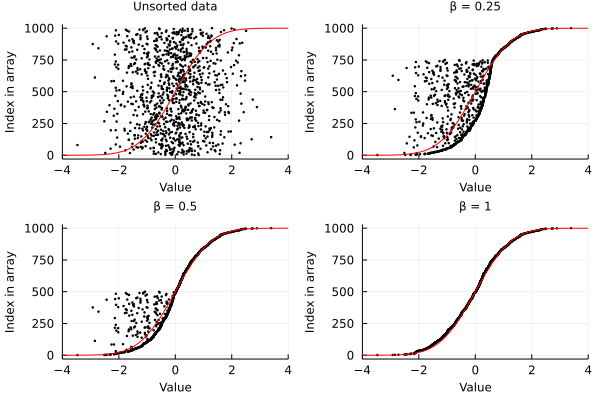

In [7]:
x_grid = -4:0.01:4

Random.seed!(0);data = rand(Normal(),1000)
p1 = scatter(data,1:1000,
            ms=1.5,msw=0,c=:black,
            xlabel="Value",ylabel="Index in array", title = "Unsorted data",xlim=(-4,4), 
            titlefontsize = 8,labelfontsize = 8,legendfontsize = 6, label = "Data")
plot!(x_grid,1000*cdf.(Normal(),x_grid), lw=1, c= :red,legendfontsize = 6,
        label = false,legend=false)

Random.seed!(0);data = rand(Normal(),1000)
doSort!(data,0.25)
p2 = scatter(data,1:1000,
            ms=1.5,msw=0,c=:black,label=false,
            xlabel="Value",ylabel="Index in array", title = "β = 0.25",xlim=(-4,4), 
            titlefontsize = 8,labelfontsize = 8)
plot!(x_grid,1000*cdf.(Normal(),x_grid), lw=1, c= :red,label=false)

Random.seed!(0);data = rand(Normal(),1000)
doSort!(data,0.5)
p3 = scatter(data,1:1000,
            label=false,ms=1.5,msw=0,c=:black,
            xlabel="Value",ylabel="Index in array", title = "β = 0.5",xlim=(-4,4), 
            titlefontsize = 8,labelfontsize = 8)
plot!(x_grid,1000*cdf.(Normal(),x_grid), lw=1, c= :red,label = false)

Random.seed!(0);data = rand(Normal(),1000)
doSort!(data,1.0)
p4 = scatter(data,1:1000,ms=1.5,msw=0,c=:black,
            xlabel="Value",ylabel="Index in array", title = "β = 1",xlim=(-4,4), 
            titlefontsize = 8, labelfontsize = 8,legend=:bottomright,label = false)
plot!(x_grid,1000*cdf.(Normal(),x_grid), lw=1, c= :red,label=false)

plot(p1, p2, p3, p4)

In [8]:
savefig("../figures/partiallySortedNormal.pdf")

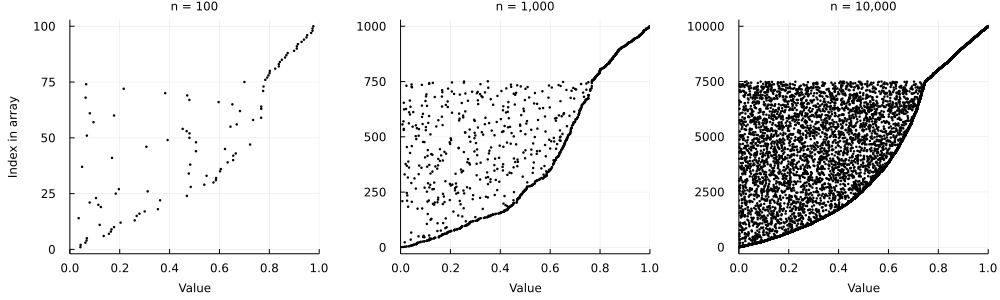

In [9]:
Random.seed!(0);data = rand(Uniform(),100)
doSort!(data,0.25)
p1 = scatter(data,1:100,
            ms=1.5,msw=0,c=:black,
            xlabel="Value",ylabel="Index in array",labelfontsize = 8, title = "n = 100",xlim=(0,1), 
            titlefontsize = 8,label=false)

Random.seed!(0);data = rand(Uniform(),1000)
doSort!(data,0.25)
p2 = scatter(data,1:1000,
            ms=1.5,msw=0,c=:black,label=false,
            xlabel="Value", title = "n = 1,000",xlim=(0,1), 
            titlefontsize = 8,labelfontsize = 8)

Random.seed!(0);data = rand(Uniform(),10000)
doSort!(data,0.25)
p3 = scatter(data,1:10000,
            label=false,ms=1.5,msw=0,c=:black,
            xlabel="Value", title = "n = 10,000",xlim=(0,1), 
            titlefontsize = 8,labelfontsize =8)
plot(p1, p2, p3,layout=(1,3),size=(1000,300),left_margin = 5mm, bottom_margin = 5mm)

In [10]:
savefig("../figures/uniformIncreasingN.pdf")

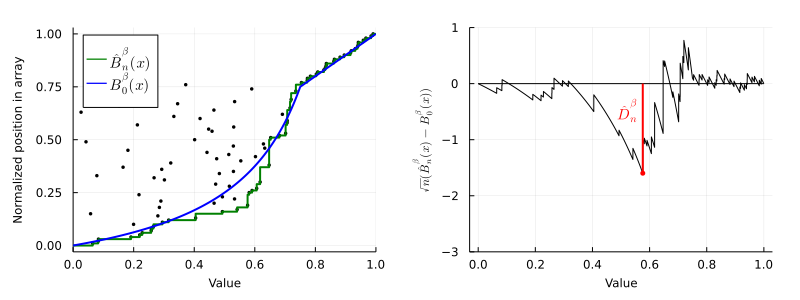

In [11]:
bb = 0.25
n = 100
Random.seed!(9);data = rand(Uniform(),n)

doSort!(data,bb)
env = ecdf(envelope(data)) # accumulate(max,data)mean((u)->u≤x, unique(accumulate(max,data)))
x_grid = 0:0.0001:1

diffs = sqrt(n)*(env.(x_grid) - B_curve_uniform.(x_grid,bb))
xs, mx = findmax(abs.(diffs))
xs = sign(diffs[mx])*xs


p1 = scatter(data,(1:n)/n,
            ms=2,msw=0,c=:black,
            xlabel="Value",ylabel="Normalized position in array",labelfontsize = 8, xlim=(0,1), 
            titlefontsize = 8,legend=:topleft,label = false)

plot!(x_grid, env.(x_grid),label = L"\hat{B}_n^\beta(x)",lw=2,legendfontsize = 10,c=:green)
plot!(x_grid,B_curve_uniform.(x_grid,bb),label = L"B_0^\beta(x)",lw=2,c=:blue)
# scatter!(envelope(data),(1:n)/n,c=:red)
# scatter!(data,(1:n)/n,ms=2,msw=0,c=:black)


p2 = plot(x_grid,diffs,
    c = :black,ylabel = L"\sqrt{n}(\hat{B}_n^\beta(x) - B^\beta_0(x))", label =false, labelfontsize = 8, xlabel="Value" )
plot!([0,1],[0,0],c=:black,label=false)
scatter!([x_grid[mx]],[xs],ms = 3,msw=0,c = :red,ylim = (-3,1),label = false,xticks=0:0.2:1.0)
plot!([x_grid[mx],x_grid[mx]],[0,xs],c=:red,lw=2,label=false)
annotate!(x_grid[mx]-0.05,0.3*xs,text(L"\hat{D}^\beta_n",:red,10),:red,label=false)

plot(p1,p2,size=(800,300),left_margin = 5mm, bottom_margin=5mm, margin=5mm)

In [12]:
test_stat = abs(xs)
p_value = 1-cdf(GeneralizedKolmogorov(0.25), test_stat)

@show test_stat
@show p_value;

test_stat = 1.5976173625855146
p_value = 0.7013541727834011


In [13]:
savefig("../figures/testIllustration.pdf")

In [14]:
bb = 0.25
n = 10^4
x_grid = -1:0.0001:1

plts=[]

Random.seed!(2)

for (i,s) in enumerate(rand(1:1000,3))
    Random.seed!(s)
    data = rand(Uniform(-1,1),n)
    xstar = quantile(Uniform(-1,1),1-bb)
    doSort!(data,bb)
    env = ecdf(envelope(data))
    diff = sqrt(n)*(env.(x_grid) - B_curve_wide_uniform.(x_grid,bb))
    plt = plot(x_grid,diff, c = :black, 
                label =false, labelfontsize = 8, xlabel="Value" )
          plot!([-1,1],[0,0],c=:black,label=false,ylim=(-3,3))
          plot!([xstar,xstar],[-3,3], c = :red,ls = :dash,label = false) 
    plt = i == 1 ? plot(plt, ylabel = L"\sqrt{n}(\hat{B}_n^\beta(x) - B^\beta_0(x))") : plot(plt)
    push!(plts,plt)
end

plot(plts...,layout=(1,3),size = (1000,400),bottommargin=5mm,margin=5mm)

In [15]:
savefig("../figures/y_process_realizations.pdf")

In [16]:
bb = 0.25
NN = 30000
stats20normal = @showprogress [bs_stat_normal(rand(Normal(),20),bb) for _ in 1:NN];
stats200normal = @showprogress [bs_stat_normal(rand(Normal(),200),bb) for _ in 1:NN];
stats2000normal = @showprogress [bs_stat_normal(rand(Normal(),2000),bb) for _ in 1:NN];

stats20uniform = @showprogress [bs_stat_uniform(rand(Uniform(),20),bb) for _ in 1:NN];
stats200uniform = @showprogress [bs_stat_uniform(rand(Uniform(),200),bb) for _ in 1:NN];
stats2000uniform = @showprogress [bs_stat_uniform(rand(Uniform(),2000),bb) for _ in 1:NN];

ecdf20normal = ecdf(stats20normal)
ecdf200normal = ecdf(stats200normal)
ecdf2000normal = ecdf(stats2000normal)

ecdf20uniform = ecdf(stats20uniform)
ecdf200uniform = ecdf(stats200uniform)
ecdf2000uniform = ecdf(stats2000uniform)

x_range = 0:0.005:5

p1 = plot(x_range, ecdf20normal.(x_range), label = "n=20",legend=:topleft,c=:green,lw=2)
    plot!(x_range, ecdf200normal.(x_range), label = "n=200",legend=:topleft,c=:blue,lw=2)
    plot!(x_range, ecdf2000normal.(x_range), label = "n=2000",legend=:topleft,c=:red,lw=2)
    plot!(x_range, cdf(GeneralizedKolmogorov(bb), x_range),label = "Limiting", 
        c = :black,xlabel="x",ylabel="CDF", lw=4,title="Normal Data",legend=:bottomright)

p2 = plot(x_range, ecdf20uniform.(x_range),legend=:topleft,c=:green,lw=2)
    plot!(x_range, ecdf200uniform.(x_range),legend=:topleft,c=:blue,lw=2)
    plot!(x_range, ecdf2000uniform.(x_range),legend=:topleft,c=:red,lw=2)
    plot!(x_range, cdf(GeneralizedKolmogorov(bb), x_range),label = "Limiting",
        c = :black,xlabel="x",lw=4, title = "Uniform Data",legend=false)

plot(p1,p2,size=(900,400),leftmargin=5mm,margin = 5mm)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:16


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:56


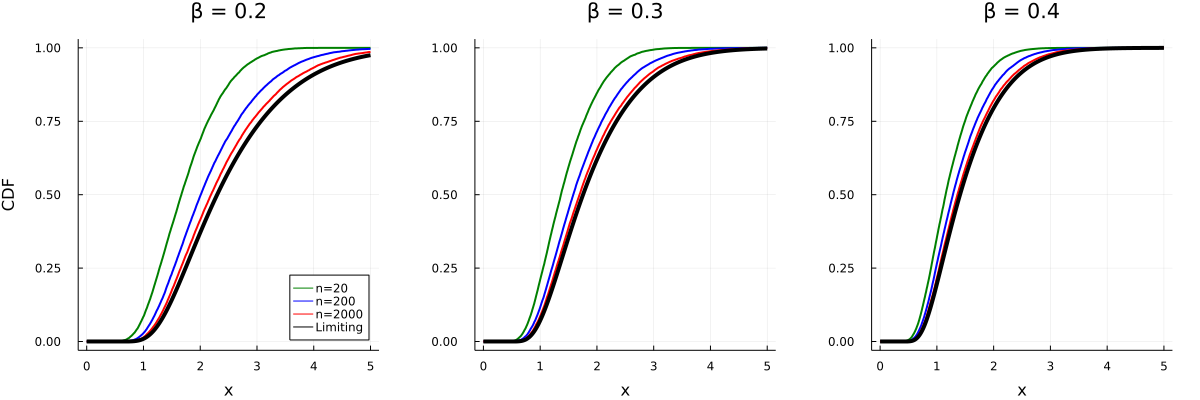

In [17]:
bb1, bb2, bb3  = 0.2, 0.3, 0.4
NN = 30000

stats20normal_1 = @showprogress [bs_stat_normal(rand(Normal(),20),bb1) for _ in 1:NN];
stats200normal_1 = @showprogress [bs_stat_normal(rand(Normal(),200),bb1) for _ in 1:NN];
stats2000normal_1 = @showprogress [bs_stat_normal(rand(Normal(),2000),bb1) for _ in 1:NN];

stats20normal_2 = @showprogress [bs_stat_normal(rand(Normal(),20),bb2) for _ in 1:NN];
stats200normal_2 = @showprogress [bs_stat_normal(rand(Normal(),200),bb2) for _ in 1:NN];
stats2000normal_2 = @showprogress [bs_stat_normal(rand(Normal(),2000),bb2) for _ in 1:NN];

stats20normal_3 = @showprogress [bs_stat_normal(rand(Normal(),20),bb3) for _ in 1:NN];
stats200normal_3 = @showprogress [bs_stat_normal(rand(Normal(),200),bb3) for _ in 1:NN];
stats2000normal_3 = @showprogress [bs_stat_normal(rand(Normal(),2000),bb3) for _ in 1:NN];

ecdf20normal_1 = ecdf(stats20normal_1)
ecdf200normal_1 = ecdf(stats200normal_1)
ecdf2000normal_1 = ecdf(stats2000normal_1)

ecdf20normal_2 = ecdf(stats20normal_2)
ecdf200normal_2 = ecdf(stats200normal_2)
ecdf2000normal_2 = ecdf(stats2000normal_2)

ecdf20normal_3 = ecdf(stats20normal_3)
ecdf200normal_3 = ecdf(stats200normal_3)
ecdf2000normal_3 = ecdf(stats2000normal_3)


x_range = 0:0.005:5

p1 = plot(x_range, ecdf20normal_1.(x_range), label = "n=20",legend=:topleft,c=:green,lw=2)
    plot!(x_range, ecdf200normal_1.(x_range), label = "n=200",legend=:topleft,c=:blue,lw=2)
    plot!(x_range, ecdf2000normal_1.(x_range), label = "n=2000",legend=:topleft,c=:red,lw=2)
    plot!(x_range, cdf(GeneralizedKolmogorov(bb1), x_range),label = "Limiting", 
        c = :black,xlabel="x",ylabel="CDF", lw=4, title="β = $bb1",legend=:bottomright)

p2 = plot(x_range, ecdf20normal_2.(x_range),legend=:topleft,c=:green,lw=2)
    plot!(x_range, ecdf200normal_2.(x_range),legend=:topleft,c=:blue,lw=2)
    plot!(x_range, ecdf2000normal_2.(x_range),legend=:topleft,c=:red,lw=2)
    plot!(x_range, cdf(GeneralizedKolmogorov(bb2), x_range),label = "Limiting",
        c = :black,xlabel="x",lw=4, title="β = $bb2", legend=false)

p3 = plot(x_range, ecdf20normal_3.(x_range),legend=:topleft,c=:green,lw=2)
    plot!(x_range, ecdf200normal_3.(x_range),legend=:topleft,c=:blue,lw=2)
    plot!(x_range, ecdf2000normal_3.(x_range),legend=:topleft,c=:red,lw=2)
    plot!(x_range, cdf(GeneralizedKolmogorov(bb3), x_range),label = "Limiting",
        c = :black,xlabel="x",lw=4, title="β = $bb3", legend=false)


plot(p1,p2,p3,layout = (1,3), size=(1200,400),leftmargin=5mm,margin = 5mm)

In [18]:
savefig("../figures/testStatConvergence.pdf")

# Numerical Examples Section

In [19]:
function wald_wolfowitz(data)
    n = length(data)
    sgns = data .>= median(data)
    nPlus, nMinus = sum(sgns), n - sum(sgns)
    wwMu = 2*nPlus*nMinus/n + 1
    wwVar = (wwMu-1)*(wwMu-2)/(n-1)

    R = 1
    for i in 1:n-1
        R += sgns[i] != sgns[i+1]
    end

    zStat = abs((R-wwMu)/sqrt(wwVar))
    2*ccdf(Normal(),zStat)
end

wald_wolfowitz (generic function with 1 method)

In [20]:
function experiment_over_β_grid(data_generation_function,
                                stat_function,
                                param_grid, 
                                param_name::String, 
                                n, #sample size 
                                NN, #MC reps
                                ; 
                                β_grid = 0.02:0.01:1.0, 
                                α = 0.1)    

    quantiles = quantile.(GeneralizedKolmogorov.(β_grid),1-α)
    bubble_results = zeros(length(param_grid),length(β_grid))
    ww_results = zeros(length(param_grid))

     #Monte Carlo Repeats

    for (i,param) in enumerate(param_grid)
        println("\nTime = ",Dates.format(now(), "HH:MM"))
        println("$param_name = $param")
        @showprogress for k in 1:NN
            data = data_generation_function(param, n)
            ww_results[i] += wald_wolfowitz(data) < α
            for (j,β) in enumerate(β_grid)
                bubble_results[i,j] += stat_function(data, β) > quantiles[j]
            end
        end
    end
    println("Finished")
    println("WW results: ", ww_results/NN)

    plot([0,1],[α,α],lw=3,c=:black,xlabel="β",ylabel="Proportion rejected",label=false)
    plot!(β_grid,bubble_results'/NN, 
            labels=hcat(map(x->"$param_name = $x",param_grid)...),lw=3,ylim=(0,1.01),legend=:topright)
end

experiment_over_β_grid (generic function with 1 method)

### Magnitude based sorting of hidden columns

In [21]:
make_proxi_sort_data(ρ, n) = last.(sort([rand(MvNormal([0,0],[1 ρ; ρ 1])) for _ in 1:n], by = x->abs(x[1])))

make_proxi_sort_data (generic function with 1 method)

In [22]:
Random.seed!(0)
experiment_over_β_grid(make_proxi_sort_data,bs_stat_normal, [0.5, 0.6, 0.7, 0.8, 0.9], "ρ",10^3,3*10^4)


Time = 22:17
ρ = 0.5


Progress: 100%|█████████████████████████████████████████| Time: 0:51:27



Time = 23:08
ρ = 0.6


Progress: 100%|█████████████████████████████████████████| Time: 7:23:21



Time = 06:32
ρ = 0.7


Progress: 100%|█████████████████████████████████████████| Time: 0:53:24



Time = 07:25
ρ = 0.8


Progress: 100%|█████████████████████████████████████████| Time: 0:53:18



Time = 08:18
ρ = 0.9


Progress: 100%|█████████████████████████████████████████| Time: 1:01:34


Finished
WW results: [0.10836666666666667, 0.10946666666666667, 0.11, 0.1064, 0.10743333333333334]


In [23]:
savefig("../figures/proxySort100.pdf")


Time = 09:20
ρ = 0.5


Progress: 100%|█████████████████████████████████████████| Time: 1:03:28



Time = 10:23
ρ = 0.6


Progress: 100%|█████████████████████████████████████████| Time: 0:58:47



Time = 11:22
ρ = 0.7


Progress: 100%|█████████████████████████████████████████| Time: 1:09:18



Time = 12:32
ρ = 0.8


Progress: 100%|█████████████████████████████████████████| Time: 1:01:58



Time = 13:34
ρ = 0.9


Progress: 100%|█████████████████████████████████████████| Time: 1:01:28


Finished
WW results: [0.10836666666666667, 0.10946666666666667, 0.11, 0.1064, 0.10743333333333334]


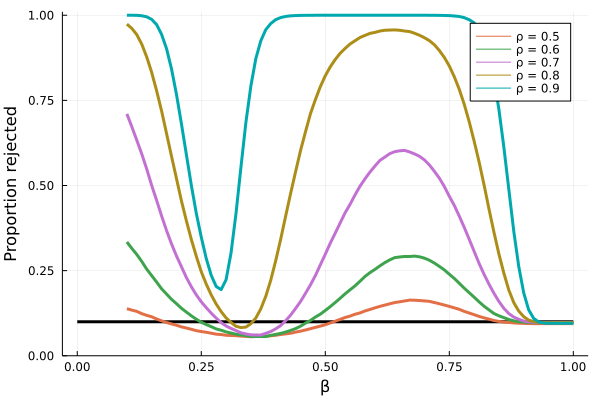

In [24]:
Random.seed!(0)
experiment_over_β_grid(make_proxi_sort_data,bs_stat_normal, 
                    [0.5, 0.6, 0.7, 0.8, 0.9], "ρ",10^3,3*10^4; β_grid = 0.1:0.01:1.0)

In [25]:
savefig("../figures/proxySort100_cut_beta.pdf")

### Service Time Dependent Scheduling in Queues

In [26]:
using DataStructures

function sim_queue_output(σ, n)
    arrival_times = sort(rand(LogNormal(log(n), σ),n) )
    service_durations = rand(n)

    next_service_completion = Inf
    next_arrival = arrival_times[1]
    a_i = 2 #next arrival index
    s_i = 1 #next service index
    o_i = 1 #next output index
    current_service_duration = -1.0 #-1.0 means no one in serivce 
    system_empty() = current_service_duration == -1.0   
    t = 0.0
    job_queue = BinaryMinMaxHeap{Float64}() 
    
    jobs_served = Array{Float64}(undef,n)

    @inbounds while next_arrival < Inf || next_service_completion < Inf
        if next_arrival < next_service_completion #Arrival is happening
            t = next_arrival
            next_arrival = a_i > n ? Inf : arrival_times[a_i]
            a_i += 1
            service_duration = service_durations[s_i]
            s_i += 1
            if system_empty()
                current_service_duration = service_duration
                next_service_completion = t + current_service_duration
            else
                push!(job_queue, service_duration)
            end            
        else  #Service completion is happening
            t = next_service_completion
            jobs_served[o_i] = current_service_duration
            o_i += 1
            
            if isempty(job_queue)
                next_service_completion = Inf
                current_service_duration = -1.0
            else
                service_duration = rand() < 0.5 ? popmin!(job_queue) : popmax!(job_queue)
                next_service_completion = t + service_duration
                current_service_duration = service_duration
            end
        end
    end
    return jobs_served
end

sim_queue_output (generic function with 1 method)


Time = 15:59
σ = 0.01


Progress: 100%|█████████████████████████████████████████| Time: 0:02:13



Time = 16:01
σ = 0.05


Progress: 100%|█████████████████████████████████████████| Time: 0:02:09



Time = 16:03
σ = 0.075


Progress: 100%|█████████████████████████████████████████| Time: 0:02:13



Time = 16:06
σ = 0.1


Progress: 100%|█████████████████████████████████████████| Time: 0:02:19



Time = 16:08
σ = 0.15


Progress: 100%|█████████████████████████████████████████| Time: 0:02:31



Time = 16:10
σ = 0.2


Progress: 100%|█████████████████████████████████████████| Time: 0:02:36


Finished
WW results: [0.20917, 0.20294, 0.19982, 0.18362, 0.12263, 0.10048]


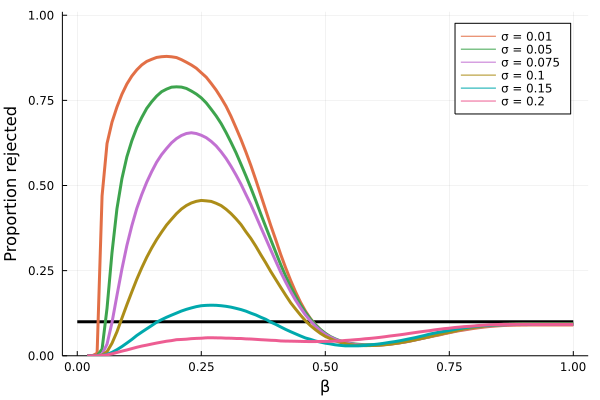

In [32]:
Random.seed!(0)
experiment_over_β_grid(sim_queue_output, bs_stat_uniform, [0.01, 0.05, 0.075, 0.1, 0.15, 0.2], "σ", 10^2,10^5)

In [33]:
savefig("../figures/queue100.pdf")


Time = 16:13
σ = 0.01


Progress: 100%|█████████████████████████████████████████| Time: 0:06:09



Time = 16:19
σ = 0.05


Progress: 100%|█████████████████████████████████████████| Time: 0:06:07



Time = 16:25
σ = 0.075


Progress: 100%|█████████████████████████████████████████| Time: 0:06:31



Time = 16:32
σ = 0.1


Progress: 100%|█████████████████████████████████████████| Time: 0:06:39



Time = 16:39
σ = 0.15


Progress: 100%|█████████████████████████████████████████| Time: 0:07:18



Time = 16:46
σ = 0.2


Progress: 100%|█████████████████████████████████████████| Time: 0:07:28


Finished
WW results: [0.20931666666666668, 0.20338333333333333, 0.1996, 0.18275, 0.12074666666666667, 0.10043333333333333]


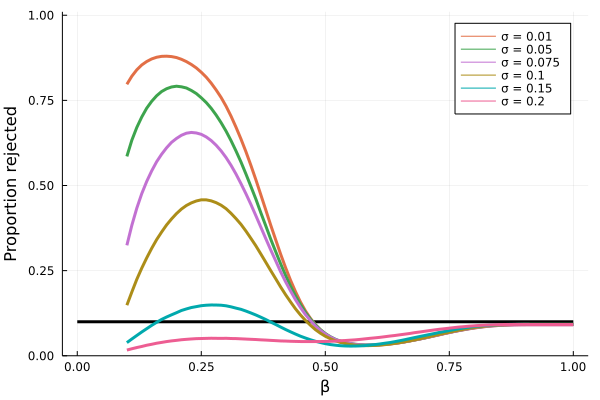

In [34]:
Random.seed!(0)
experiment_over_β_grid(sim_queue_output, bs_stat_uniform, 
        [0.01, 0.05, 0.075, 0.1, 0.15, 0.2], "σ", 10^2,3*10^5;β_grid = 0.1:0.01:1.0)

In [35]:
savefig("../figures/queue100_cut_beta.pdf")